## Moestl et al. 2024 ICMECAT paper


script to produce paper results

uses environment helio4, see /envs

In [1]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import os
import scipy
import copy

import astropy.constants as const

from sunpy.time import parse_time


print(scipy.__version__)

print(os.system('pwd'))


def powerlaw(x, a, b):
    return a*x**b


1.10.0
/Users/chris/python/heliocats/scripts
0


## load data

In [2]:
#load icmecat as pandas dataframe
file='../icmecat/HELIO4CAST_ICMECAT_v21_pandas.p'
[ic_pandas,h,p]=pickle.load( open(file, 'rb'))   

ic=ic_pandas

ic_mo_start_time_num=parse_time(ic.mo_start_time).plot_date

#get indices for each target
imes=np.where(ic.sc_insitu=='MESSENGER')[0]
ivex=np.where(ic.sc_insitu=='VEX')[0]
iwin=np.where(ic.sc_insitu=='Wind')[0]
imav=np.where(ic.sc_insitu=='MAVEN')[0]
ijun=np.where(ic.sc_insitu=='Juno')[0]

ista=np.where(ic.sc_insitu=='STEREO-A')[0]
istb=np.where(ic.sc_insitu=='STEREO-B')[0]
ipsp=np.where(ic.sc_insitu=='PSP')[0]
isol=np.where(ic.sc_insitu=='SolarOrbiter')[0]
ibep=np.where(ic.sc_insitu=='BepiColombo')[0]
iuly=np.where(ic.sc_insitu=='ULYSSES')[0]



## load PSP data
print('load PSP data RTN')
filepsp='/Users/chris/python/data/insitu_python/psp_2018_now_rtn.p'
[psp,hpsp]=pickle.load(open(filepsp, "rb" ) ) 
print('done')


## load SolO data
print('load Solar Orbiter RTN')
[solo,hsolo]=pickle.load(open('/Users/chris/python/data/insitu_python/solo_2020_now_rtn.p', "rb" ) )    
print('done')


load PSP data RTN
done
load Solar Orbiter RTN
done


## (1) Solar Orbiter Example

2023-04-10 02:00:00
2023-04-10 20:00:00
saved as  ../results/moestl_2024_icmecat/fig1_solo_example.pdf


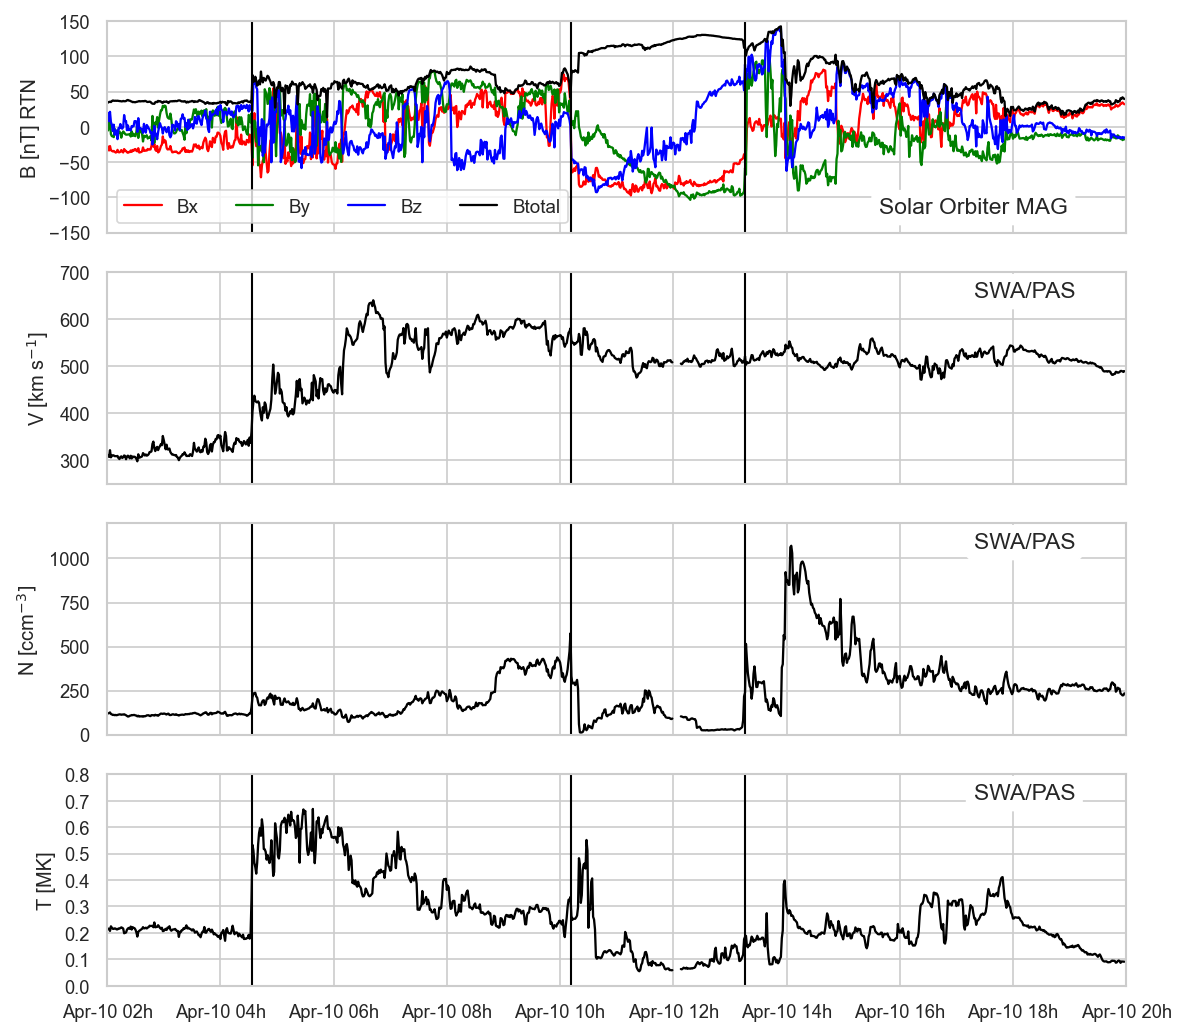

In [3]:
sns.set_style('whitegrid')
sns.set_context('paper')

start=parse_time('2023-04-10 02:00').datetime
end=parse_time('2023-04-10 20:00').datetime

startind=np.where(start > solo.time)[0][-1]
endind=np.where(end > solo.time)[0][-1]

i=np.where(ic.icmecat_id=='ICME_SOLO_MOESTL_20230410_01')[0][0]

sc=solo[startind:endind]

print(start)
print(end)


lw=1.1

fig=plt.figure(figsize=(8,7), dpi=150)

ax1 = plt.subplot(411) 

ax1.plot_date(sc.time,sc.bx,'-r',label='Bx',linewidth=lw)
ax1.plot_date(sc.time,sc.by,'-g',label='By',linewidth=lw)
ax1.plot_date(sc.time,sc.bz,'-b',label='Bz',linewidth=lw)
ax1.plot_date(sc.time,sc.bt,'-k',label='Btotal',lw=lw)


    
#plot vertical lines
ax1.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[-500,500],'-k',linewidth=1)            
ax1.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[-500,500],'-k',linewidth=1)            
ax1.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[-500,500],'-k',linewidth=1)


plt.ylabel('B [nT] RTN')
plt.legend(loc=3,ncol=4,fontsize=9)
ax1.set_xlim(start,end)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_yticks(np.arange(-200,200,50))
ax1.set_ylim((-150, 150))

#ax1.set_xticklabels([]) does not work with sharex
#plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_xticklabels(), visible=False)




ax2 = plt.subplot(412,sharex=ax1) 
ax2.plot_date(sc.time,sc.vt,'-k',label='V',linewidth=lw)

plt.ylabel('V [km s$^{-1}$]')
ax2.set_xlim(start,end)
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax2.set_yticks(np.arange(0,1000,100))
#ax2.tick_params(axis="y", labelsize=12)
plt.ylim((250, 700))

#ax2.set_xticklabels([])
plt.setp(ax2.get_xticklabels(), visible=False)

ax2.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,3000],'-k',linewidth=1)            
ax2.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[0,3000],'-k',linewidth=1)            
ax2.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[0,3000],'-k',linewidth=1)     




ax3 = plt.subplot(413,sharex=ax1) 
ax3.plot_date(sc.time,sc.np,'-k',label='Np',linewidth=lw)

plt.ylabel('N [ccm$^{-3}]$')
ax3.set_xlim(start,end)
ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
plt.ylim((0, 1200))
#ax3.set_xticklabels([])
plt.setp(ax3.get_xticklabels(), visible=False)

#plot vertical lines
ax3.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,10000],'-k',linewidth=1)
ax3.plot_date([ic.mo_start_time[i],  ic.mo_start_time[i]],  [0,10000],'-k',linewidth=1)
ax3.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],        [0,10000],'-k',linewidth=1)   



ax4 = plt.subplot(414,sharex=ax1) 
ax4.plot_date(sc.time,sc.tp/1e6,'-k',label='Tp',linewidth=lw)

plt.ylabel('T [MK]')
ax4.set_xlim(start,end)
ax4.set_yticks(np.arange(0,1,0.1))
ax4.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
plt.ylim((0, 0.8))



#plot vertical lines
ax4.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,100],'-k',linewidth=1)            
ax4.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[0,100],'-k',linewidth=1)            
ax4.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[0,100],'-k',linewidth=1)            





ax1.annotate('Solar Orbiter MAG',xy=(0.85,0.09),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white') )
ax2.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax3.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax4.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))


plt.tight_layout()
#plt.show()

plotfile='../results/moestl_2024_icmecat/fig1_solo_example.png'
plt.savefig(plotfile)
plotfile='../results/moestl_2024_icmecat/fig1_solo_example.pdf'
plt.savefig(plotfile)
print('saved as ',plotfile)

## (2) PSP magnetic fields close in observations

saved as  ../results/moestl_2024_icmecat/fig2_psp_close.pdf


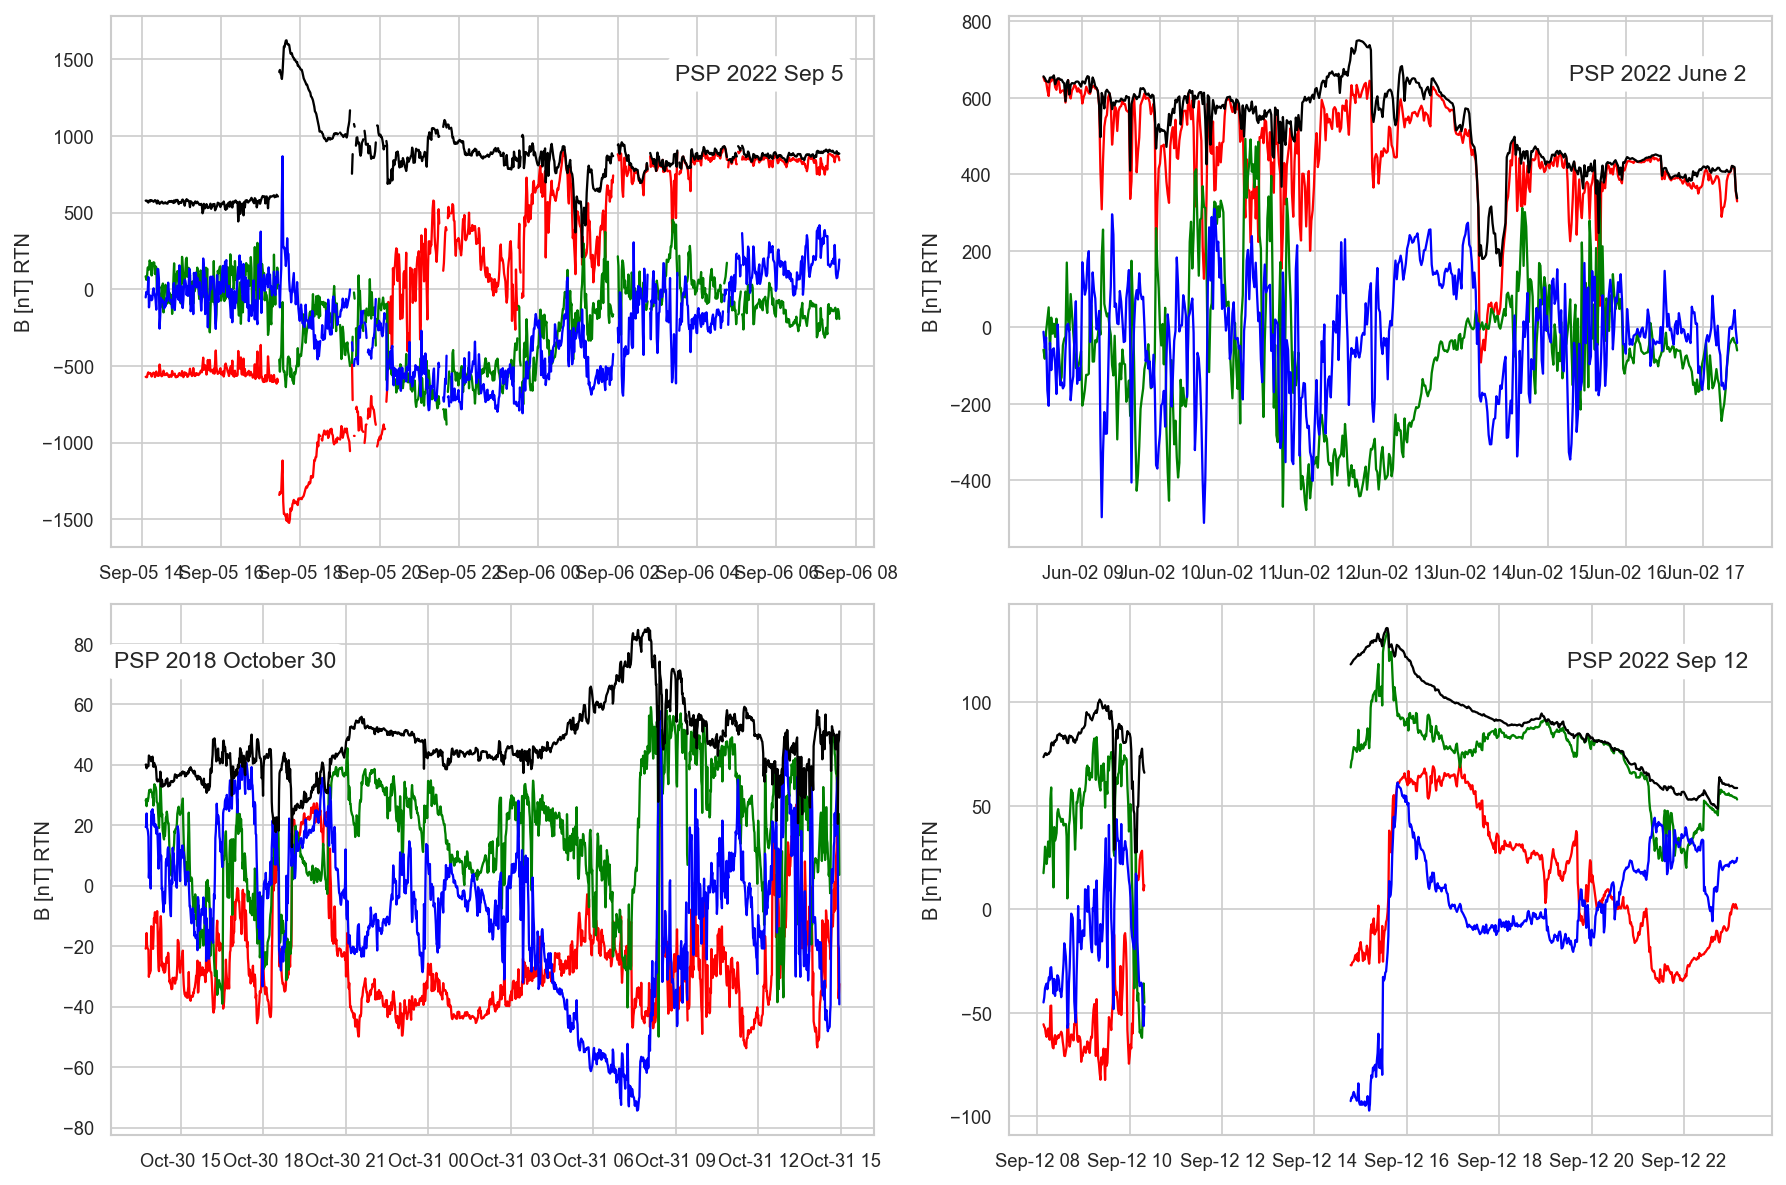

In [4]:
sns.set_style('whitegrid')
sns.set_context('paper')



#PSP events
i1=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220905_01')[0][0]
starttime1=ic.icme_start_time[i1]
endtime1=ic.mo_end_time[i1]
startind1=np.where(starttime1 > psp.time)[0][-1]
endind1=np.where(endtime1 > psp.time)[0][-1]
sc1=psp[startind1-200:endind1+400]


i2=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220602_01')[0][0]
starttime2=ic.icme_start_time[i2]
endtime2=ic.mo_end_time[i2]
startind2=np.where(starttime2 > psp.time)[0][-1]
endind2=np.where(endtime2 > psp.time)[0][-1]
sc2=psp[startind2-200:endind2+200]


i3=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20181030_01')[0][0]
starttime3=ic.icme_start_time[i3]
endtime3=ic.mo_end_time[i3]
startind3=np.where(starttime3 > psp.time)[0][-1]
endind3=np.where(endtime3 > psp.time)[0][-1]
sc3=psp[startind3-400:endind3+400]


i4=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220912_01')[0][0]
starttime4=ic.icme_start_time[i4]
endtime4=ic.mo_end_time[i4]
startind4=np.where(starttime4 > psp.time)[0][-1]
endind4=np.where(endtime4 > psp.time)[0][-1]
sc4=psp[startind4-400:endind4+400]



lw=1.1

fig=plt.figure(figsize=(12,8), dpi=150)

ax1 = plt.subplot(221) 
ax1.plot_date(sc1.time,sc1.bx,'-r',label='Bx',linewidth=lw)
ax1.plot_date(sc1.time,sc1.by,'-g',label='By',linewidth=lw)
ax1.plot_date(sc1.time,sc1.bz,'-b',label='Bz',linewidth=lw)
ax1.plot_date(sc1.time,sc1.bt,'-k',label='Btotal',lw=lw)
ax1.set_ylabel('B [nT] RTN')
ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax1.annotate('PSP 2022 Sep 5',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

ax2 = plt.subplot(222) 
ax2.plot_date(sc2.time,sc2.bx,'-r',label='Bx',linewidth=lw)
ax2.plot_date(sc2.time,sc2.by,'-g',label='By',linewidth=lw)
ax2.plot_date(sc2.time,sc2.bz,'-b',label='Bz',linewidth=lw)
ax2.plot_date(sc2.time,sc2.bt,'-k',label='Btotal',lw=lw)
ax2.set_ylabel('B [nT] RTN')
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax2.annotate('PSP 2022 June 2',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))



ax3 = plt.subplot(223) 
ax3.plot_date(sc3.time,sc3.bx,'-r',label='Bx',linewidth=lw)
ax3.plot_date(sc3.time,sc3.by,'-g',label='By',linewidth=lw)
ax3.plot_date(sc3.time,sc3.bz,'-b',label='Bz',linewidth=lw)
ax3.plot_date(sc3.time,sc3.bt,'-k',label='Btotal',lw=lw)
ax3.set_ylabel('B [nT] RTN')
ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax3.annotate('PSP 2018 October 30',xy=(0.15,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))



ax4 = plt.subplot(224) 
ax4.plot_date(sc4.time,sc4.bx,'-r',label='Bx',linewidth=lw)
ax4.plot_date(sc4.time,sc4.by,'-g',label='By',linewidth=lw)
ax4.plot_date(sc4.time,sc4.bz,'-b',label='Bz',linewidth=lw)
ax4.plot_date(sc4.time,sc4.bt,'-k',label='Btotal',lw=lw)
ax4.set_ylabel('B [nT] RTN')
ax4.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax4.annotate('PSP 2022 Sep 12',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))



plt.tight_layout()
#plt.show()

plotfile='../results/moestl_2024_icmecat/fig2_psp_close.png'
plotfile='../results/moestl_2024_icmecat/fig2_psp_close.pdf'

plt.savefig(plotfile)
print('saved as ',plotfile)

## (3) Figure for ICMECAT times and distance

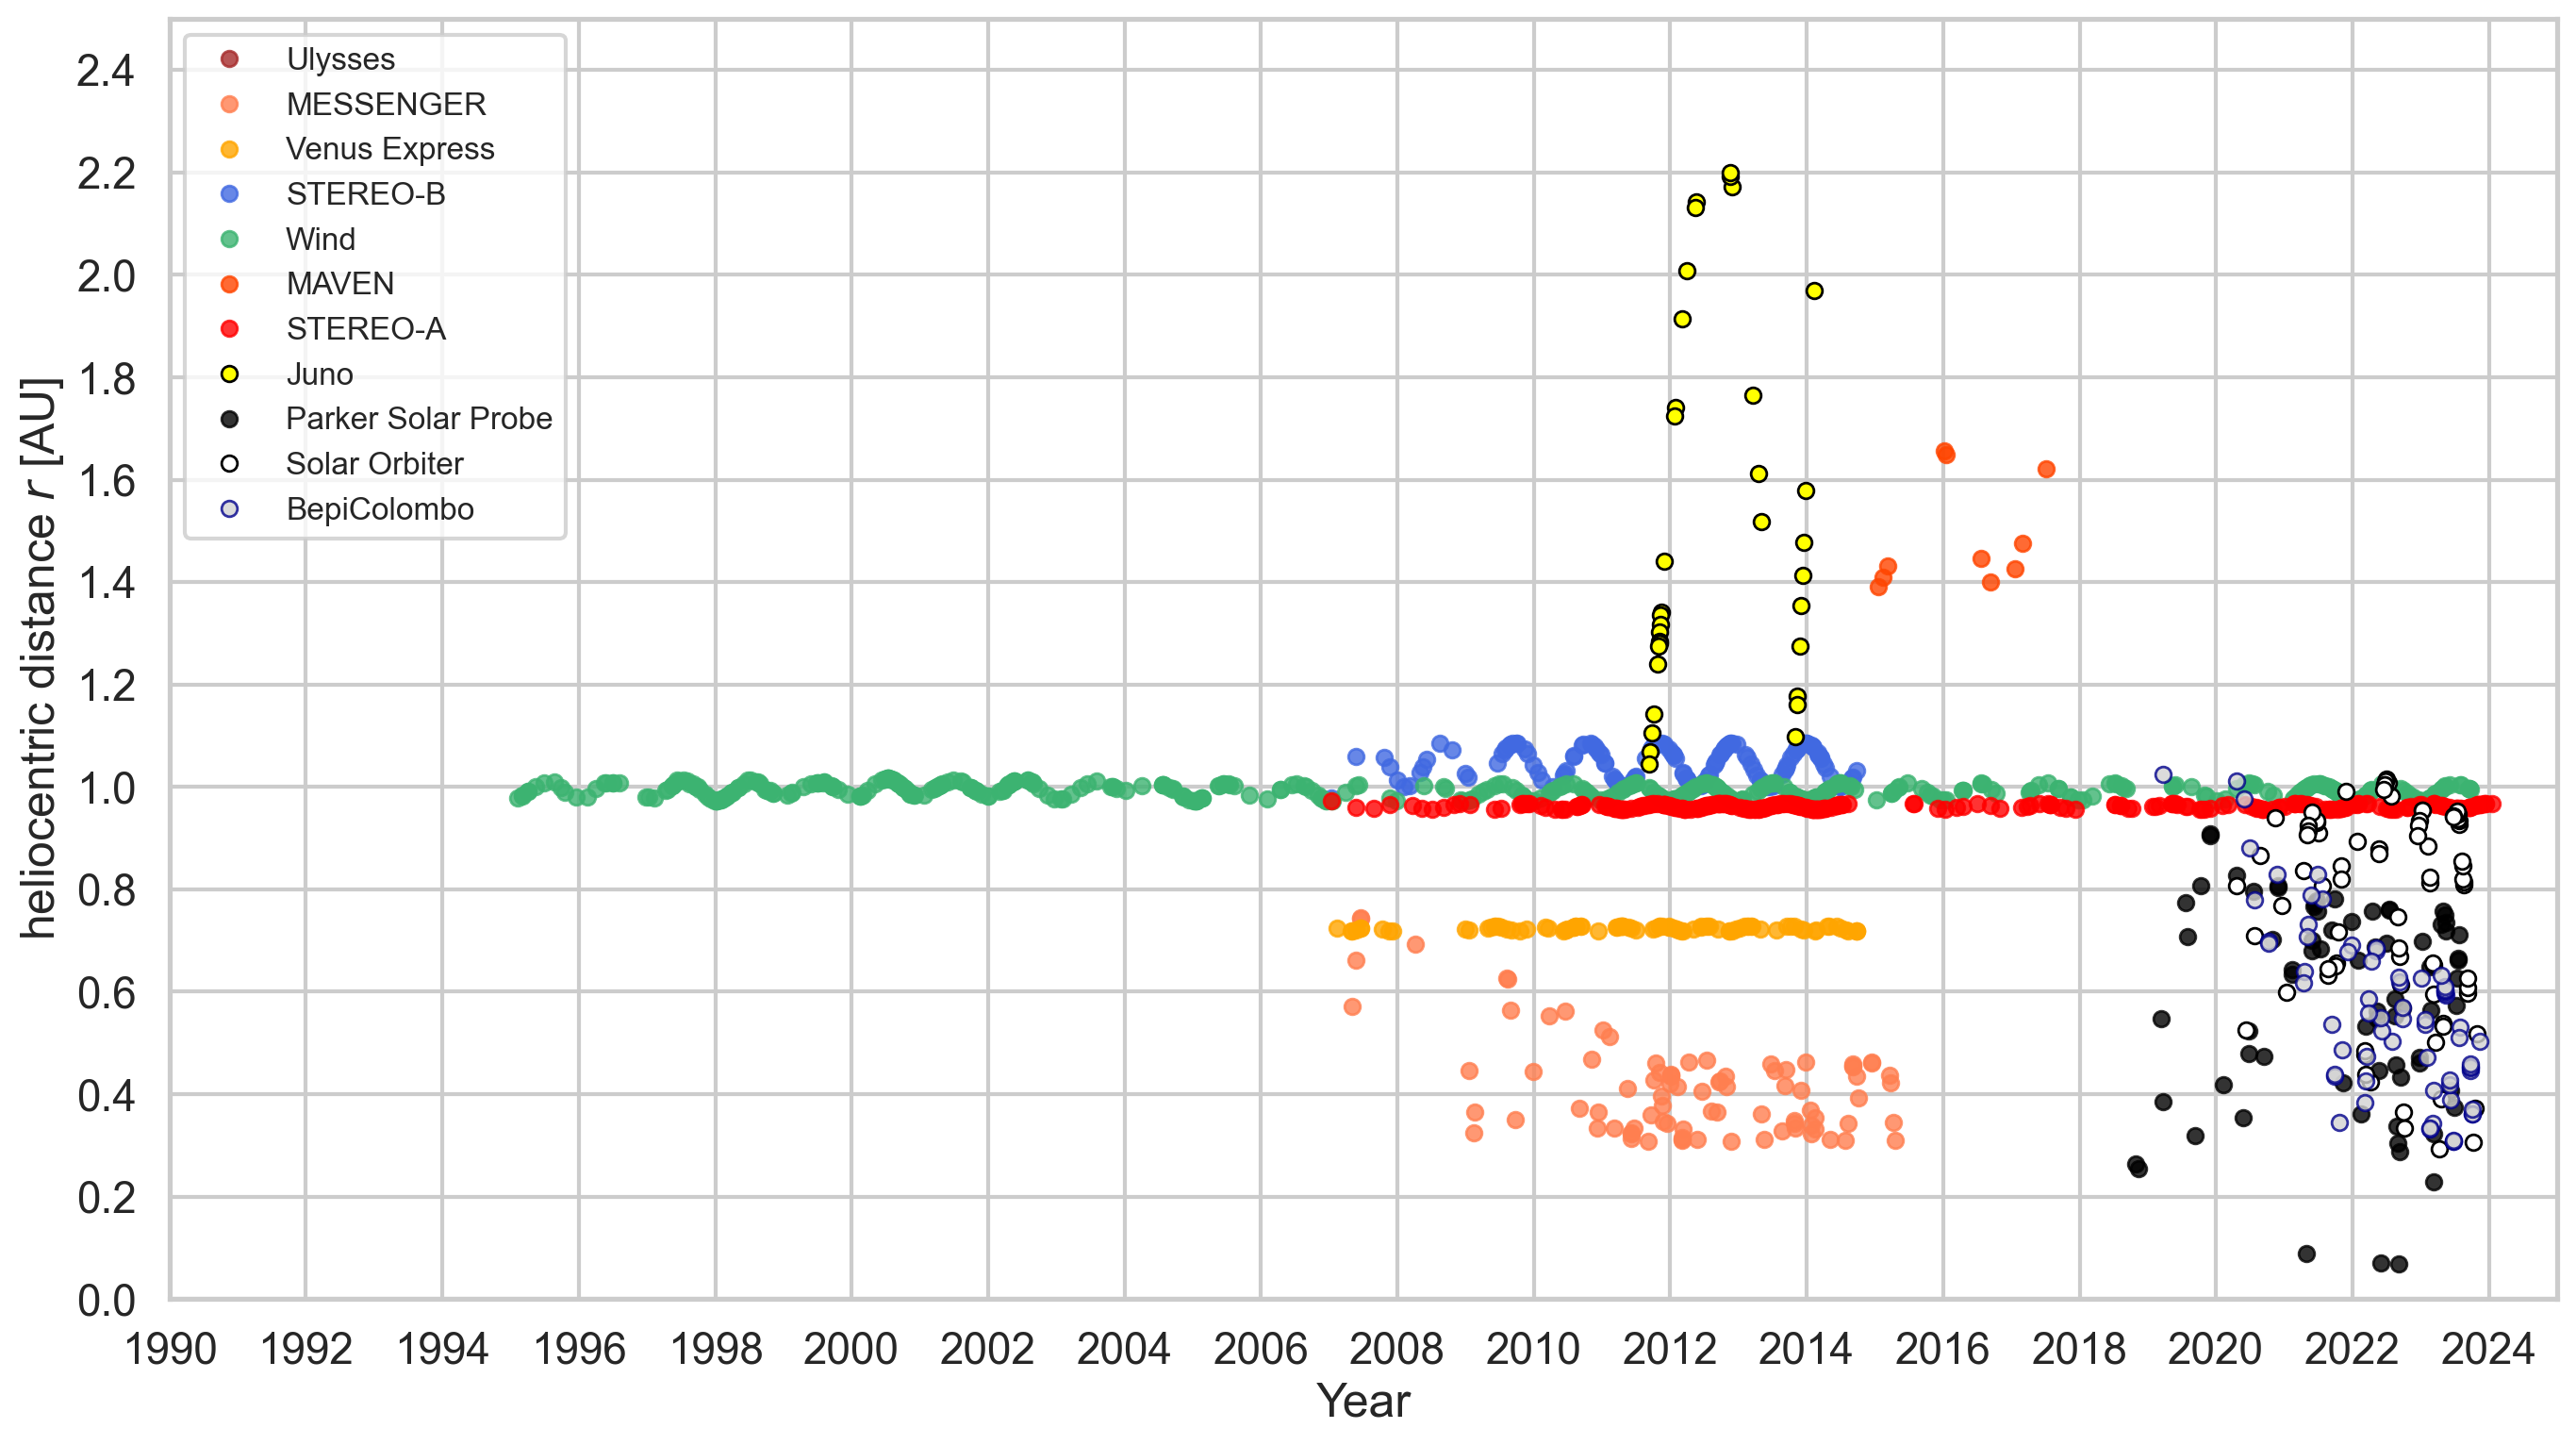

In [5]:
sns.set_context("talk")     
sns.set_style('whitegrid')

###############################################################################
fig=plt.figure(3,figsize=(14,8),dpi=200)

#########################################################################
ax1=plt.subplot(111)
#plt.title('ICMECAT event times and distance')

#markersize
ms=6
#alpha
al=0.8

ax1.plot_date(ic_mo_start_time_num[iuly],ic.mo_sc_heliodistance[iuly],'o',c='brown', alpha=al,ms=ms,label='Ulysses')
ax1.plot_date(ic_mo_start_time_num[imes],ic.mo_sc_heliodistance[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax1.plot_date(ic_mo_start_time_num[ivex],ic.mo_sc_heliodistance[ivex],'o',c='orange', alpha=al,ms=ms,label='Venus Express')
ax1.plot_date(ic_mo_start_time_num[istb],ic.mo_sc_heliodistance[istb],'o',c='royalblue', alpha=al,ms=ms,label='STEREO-B')
ax1.plot_date(ic_mo_start_time_num[iwin],ic.mo_sc_heliodistance[iwin],'o',c='mediumseagreen', alpha=al,ms=ms,label='Wind')
ax1.plot_date(ic_mo_start_time_num[imav],ic.mo_sc_heliodistance[imav],'o',c='orangered', alpha=al,ms=ms,label='MAVEN')
ax1.plot_date(ic_mo_start_time_num[ista],ic.mo_sc_heliodistance[ista],'o',c='red', alpha=al,ms=ms, label='STEREO-A')
ax1.plot_date(ic_mo_start_time_num[ijun],ic.mo_sc_heliodistance[ijun],'o',c='black',markerfacecolor='yellow', alpha=1,ms=ms,label='Juno')

ax1.plot_date(ic_mo_start_time_num[ipsp],ic.mo_sc_heliodistance[ipsp],'o',c='black', alpha=al,ms=ms,label='Parker Solar Probe')
ax1.plot_date(ic_mo_start_time_num[isol],ic.mo_sc_heliodistance[isol],'o',c='black',markerfacecolor='white', alpha=1.0,ms=ms,label='Solar Orbiter')
ax1.plot_date(ic_mo_start_time_num[ibep],ic.mo_sc_heliodistance[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')


ax1.set_ylabel('heliocentric distance $r$ [AU]')
ax1.set_xlabel('Year')
ax1.set_ylim([0,1.7])

years = mdates.YearLocator(2)   
ax1.xaxis.set_major_locator(years)
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)

#ax1.tick_params(axis="x", labelsize=12)
#ax1.tick_params(axis="y", labelsize=12)

ax1.set_xlim([datetime.datetime(1990,1,1),datetime.datetime(2025,1,1)])


ax1.legend(loc=2,fontsize=12)

ax1.set_yticks(np.arange(0,4,0.2))
ax1.set_ylim([0,2.5])

plt.tight_layout()
plt.savefig('../results/moestl_2024_icmecat/fig3_icmecat_obs.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig3_icmecat_obs.pdf', dpi=150,bbox_inches='tight')


### B(r) curve fits in magnetic obstacle

B(r) for MO_Bmean
start fit at 1 solar radii, in AU:  0.0047

LM; TRF; dogbox methods
[10.16496617 -1.59056983]
[10.16496188 -1.59057004]
[10.16496172 -1.59057005]
LM results in detail
Parameters a and b, y = a x^b: [10.16 -1.59]
3 standard deviation on a and b [0.66 0.03]




-----------------------------
B(r) for MO_Bmax
LM; TRF; dogbox methods
[14.57636366 -1.54266042]
[14.5763853  -1.54265967]
[14.57637268 -1.54266011]
LM results in detail
Parameters a and b, y = a x^b: [14.58 -1.54]
3 standard deviation on a and b [1.05 0.03]






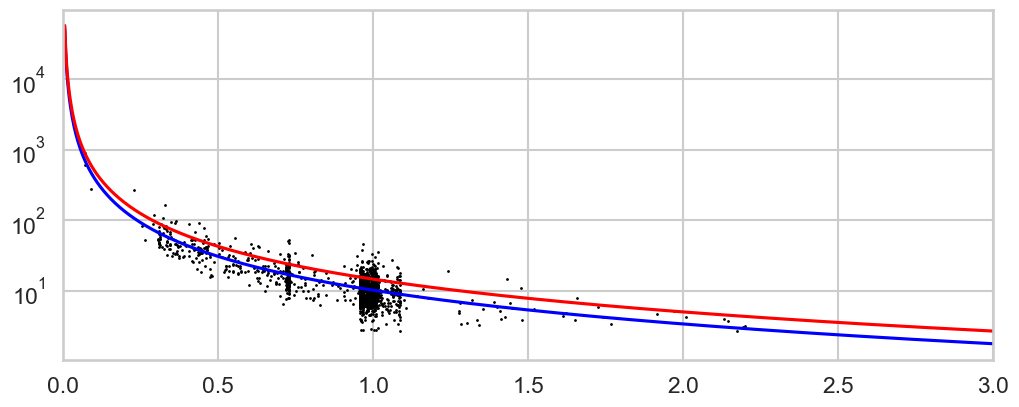

In [6]:
print('B(r) for MO_Bmean')

r=ic.mo_sc_heliodistance
b=ic.mo_bmean

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)


rs=1*const.R_sun/const.au
print('start fit at 1 solar radii, in AU: ',np.round(rs,4))
print()
fitx=np.linspace(rs,3,num=1000)


#curve fit, no initial guess, all methods arrive at similar values

#Algorithm to perform minimization.
#‘trf’ : Trust Region Reflective algorithm, particularly suitable for large sparse problems with bounds. Generally robust method.
#‘dogbox’ : dogleg algorithm with rectangular trust regions, typical use case is small problems with bounds. Not recommended for problems with rank-deficient Jacobian.
#‘lm’ : Levenberg-Marquardt algorithm as implemented in MINPACK. Doesn’t handle bounds and sparse Jacobians. Usually the most efficient method for small unconstrained problems.
fit_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit_trf[0])
print(fit_lm[0])
print(fit_dogbox[0])


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmean
param=fit_lm[0]
pcov=fit_lm[1]
perr = np.sqrt(np.diag(pcov))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param,2))
print('3 standard deviation on a and b', 3*np.round(perr,2))
print()
print()


#---------------------------------------------------------------


fig=plt.figure(3,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,3)
ax.plot(fitx,powerlaw(fitx,param[0],param[1]),'-b')

#LM results
print()
print()






print('-----------------------------')

###########################################################################
print('B(r) for MO_Bmax')

r=ic.mo_sc_heliodistance
b=ic.mo_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

fit2_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit2_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit2_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')


print('LM; TRF; dogbox methods')
print(fit2_trf[0])
print(fit2_lm[0])
print(fit2_dogbox[0])

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmax
param2=fit2_lm[0]
pcov2=fit2_lm[1]
perr2 = np.sqrt(np.diag(pcov2))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param2,2))
print('3 standard deviation on a and b', 3*np.round(perr2,2))
print()
print()


#---------------------------------------------------------------

#ax2=plt.subplot(212)
#ax2.plot(r,b,'ok', markersize=1)
#ax2.set_yscale('log')
#ax2.set_xlim(0,3)

ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-r')


#LM results
print()
print()


#all results , e.g. nfev indicates the number of function calls
#print(fit2_lm)

## (3) Figure B(R) in magnetic obstacle

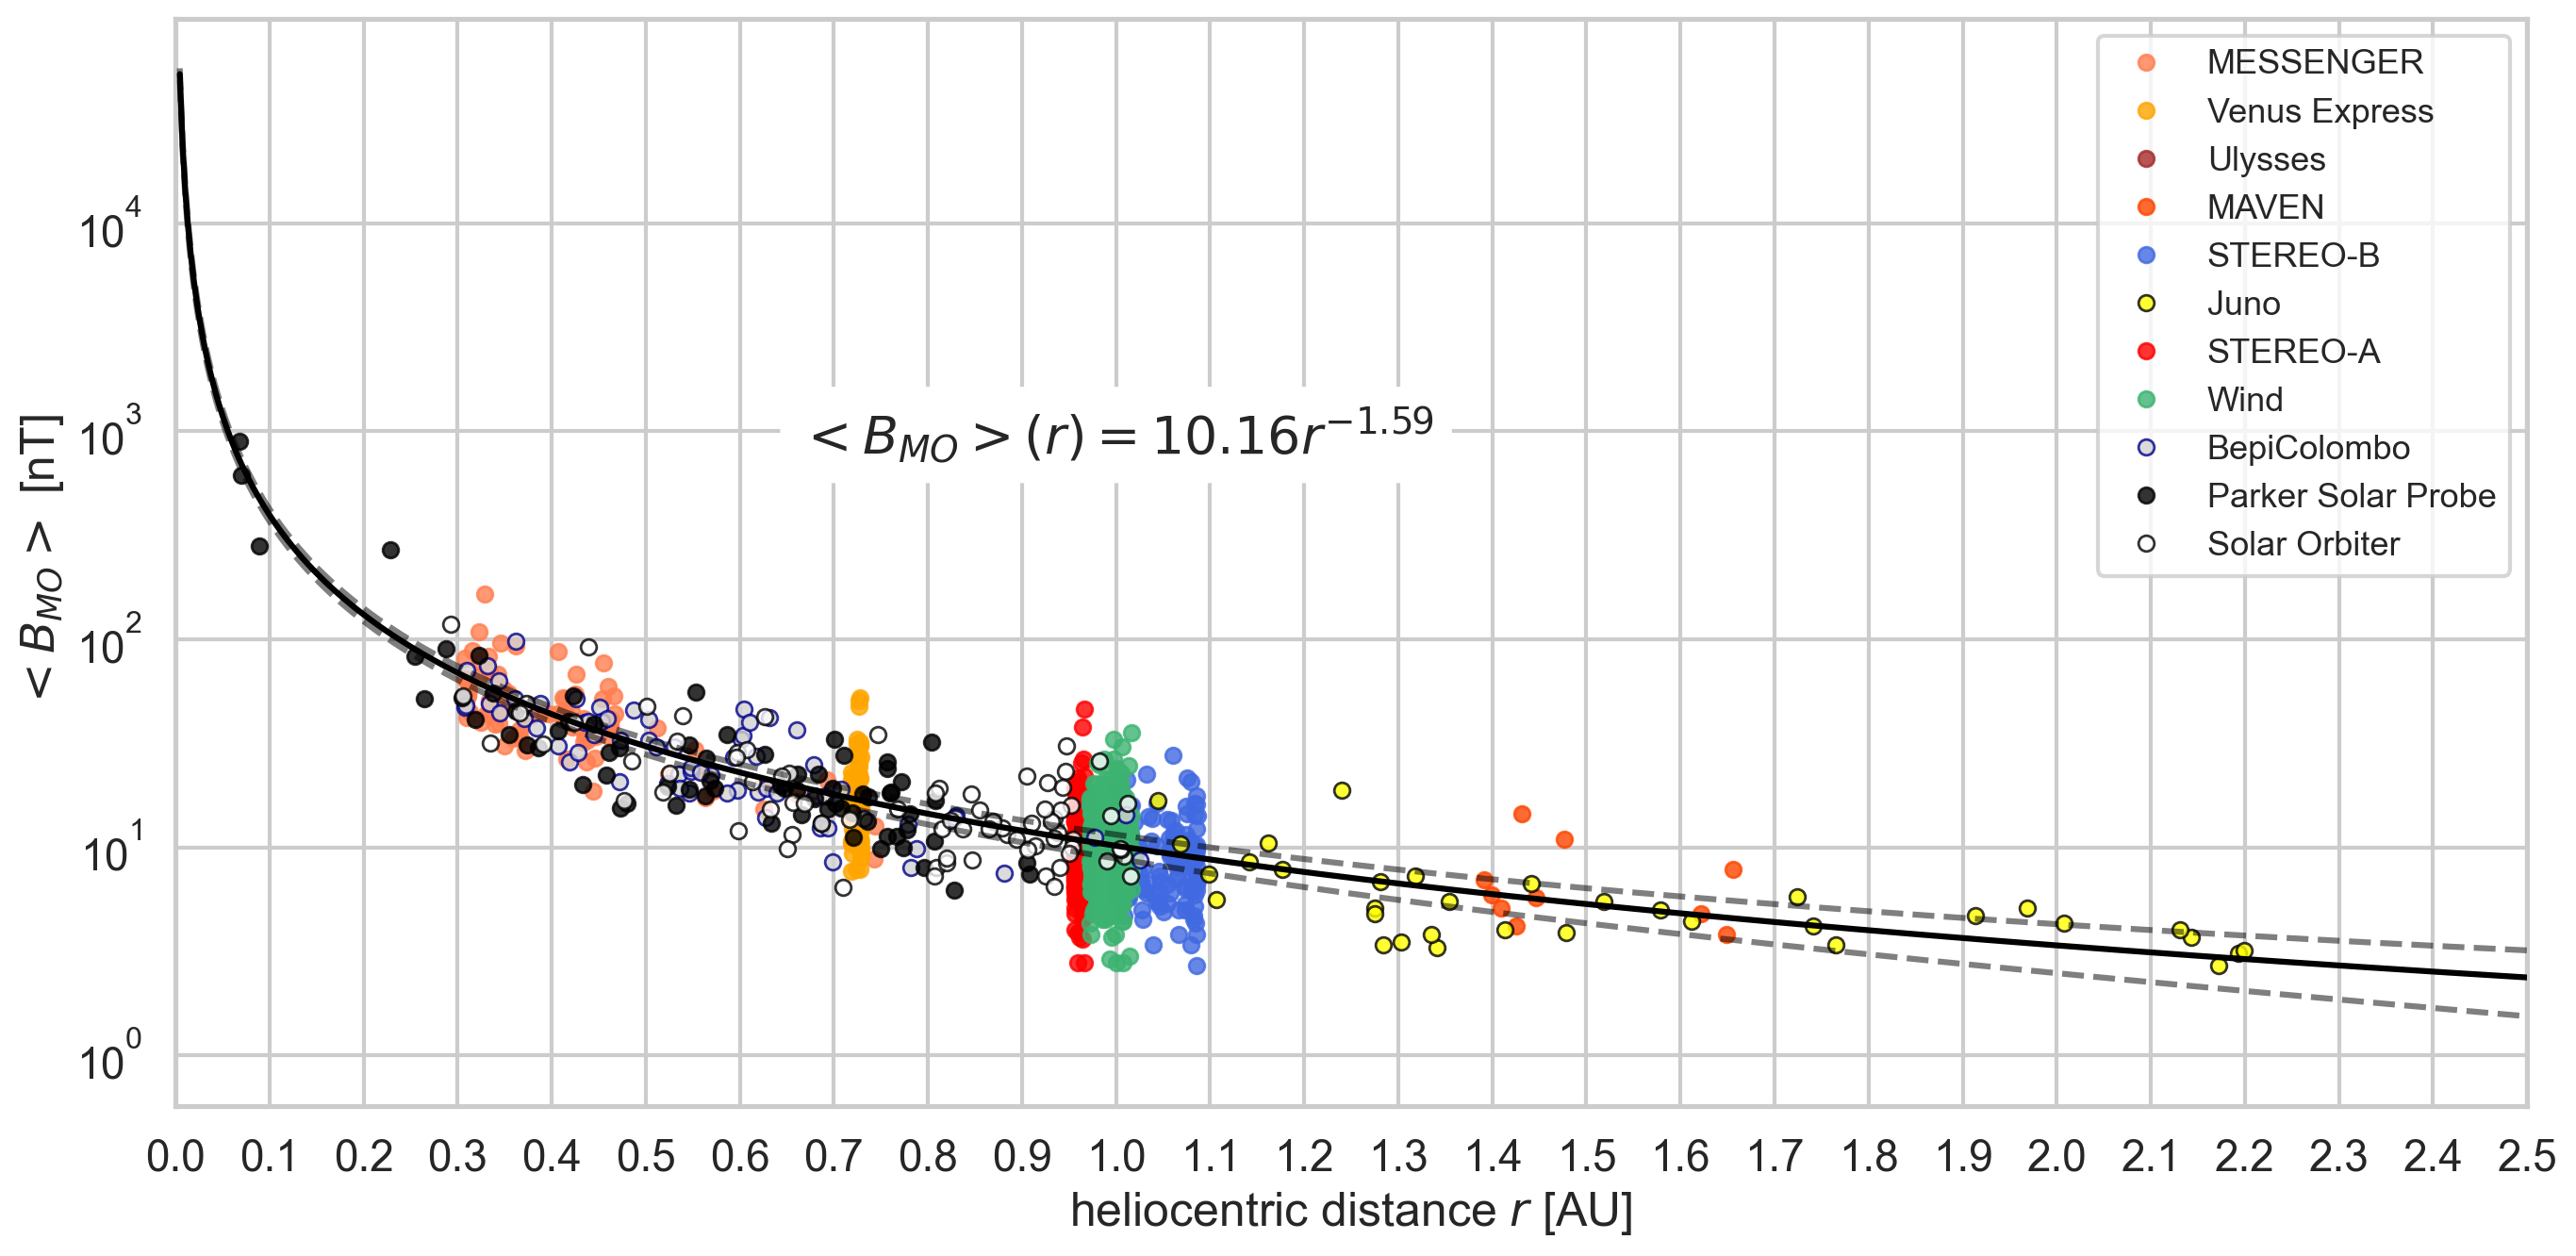

In [7]:
sns.set_context("talk")     
sns.set_style('whitegrid')

###############################################################################
fig=plt.figure(3,figsize=(14,7),dpi=200)

##############################################################################
ax=plt.subplot(111)
#plt.title('ICMECAT mean magnetic field in the magnetic obstacle')
ax.set_xlabel('heliocentric distance $r$ [AU]')
ax.set_ylabel('$<B_{MO}>$ [nT]')


#date
ax.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax.plot(ic.mo_sc_heliodistance[ivex],ic.mo_bmean[ivex],'o',c='orange', alpha=al,ms=ms,label='Venus Express')
ax.plot(ic.mo_sc_heliodistance[iuly],ic.mo_bmean[iuly],'o',c='brown', alpha=al,ms=ms, label='Ulysses')
ax.plot(ic.mo_sc_heliodistance[imav],ic.mo_bmean[imav],'o',c='orangered', alpha=al,ms=ms, label='MAVEN')
ax.plot(ic.mo_sc_heliodistance[istb],ic.mo_bmean[istb],'o',c='royalblue', alpha=al,ms=ms, label='STEREO-B')
ax.plot(ic.mo_sc_heliodistance[ijun],ic.mo_bmean[ijun],'o', c='black',markerfacecolor='yellow', alpha=al,ms=ms, label='Juno')


ax.plot(ic.mo_sc_heliodistance[ista],ic.mo_bmean[ista],'o',c='red', alpha=al,ms=ms, label='STEREO-A')
ax.plot(ic.mo_sc_heliodistance[iwin],ic.mo_bmean[iwin],'o',c='mediumseagreen', alpha=al,ms=ms,label='Wind')
ax.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe',zorder=3)
ax.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter',zorder=3)



au_axis=np.arange(0,5,0.1)
ax.set_xticks(au_axis)
#ax3.tick_params(axis="x", labelsize=12)
ax.set_xlim([0,2.5])


################ Create a second x-axis

#scaling factor au to Rs
#scale=1/rs.value

#ax1 = ax.twiny()
#ax1.set_xlabel('$r$ [solar radii]', color='black')

#plot something in the solar radii scale but do not show it

#ax1.plot(ic.mo_sc_heliodistance[ista]*scale, ic.mo_bmean[ista], '.',color=None)
#ax1_ticks=np.arange(0,2.5*scale,50)
#ax1.set_xticks(ax1_ticks)


ax.set_yscale('log')

#ax3.set_ylim([0,np.max(ic.mo_bmean)+50])
#ax3.set_yticks(np.arange(0,1000,10))
#ax3.set_ylim([0,1000])
#ax3.tick_params(axis="y", labelsize=12)



####### fits
ax.plot(fitx,powerlaw(fitx,param[0],param[1]),'-k', zorder=5)
#with errors 3 std
ax.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--k',alpha=0.5, zorder=5)
ax.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--k',alpha=0.5, zorder=5)



formulastring='$<B_{MO}>(r)='+str(np.round(param[0],2))+'r ^{'+str(np.round(param[1],2))+'}$'
ax.annotate(formulastring,xy=(0.4,0.6),xycoords='axes fraction',fontsize=20,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

ax.legend(loc=1,fontsize=13)


plt.tight_layout()

plt.savefig('../results/moestl_2024_icmecat/fig4_br_mo.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig4_br_mo.pdf', dpi=150,bbox_inches='tight')


/var/folders/tr/3wb8vxgd5sj97xz5dz09q0qm0000gn/T/ipykernel_3503/2755373233.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,10**9])
/Users/chris/python/miniconda3/envs/helio4/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',




value of power law at 1 Rs from in situ
predicted field by MO power law at 1 Rs 0.0  Gauss
sunspot field: 2000.0 Gauss 

predicted field by MO power law at 1.5 Rs 0.0  nT
coronal loop field: 50.0 Gauss 

B(r) < 0.3 for MO bmax
LM; TRF; dogbox methods
[ 5.34786494e-15 -9.67673047e+00]
fit results in detail
Parameters a and b, y = a x^b: [ 0.         -9.67673047]


ICME power law fails to connect to Sun


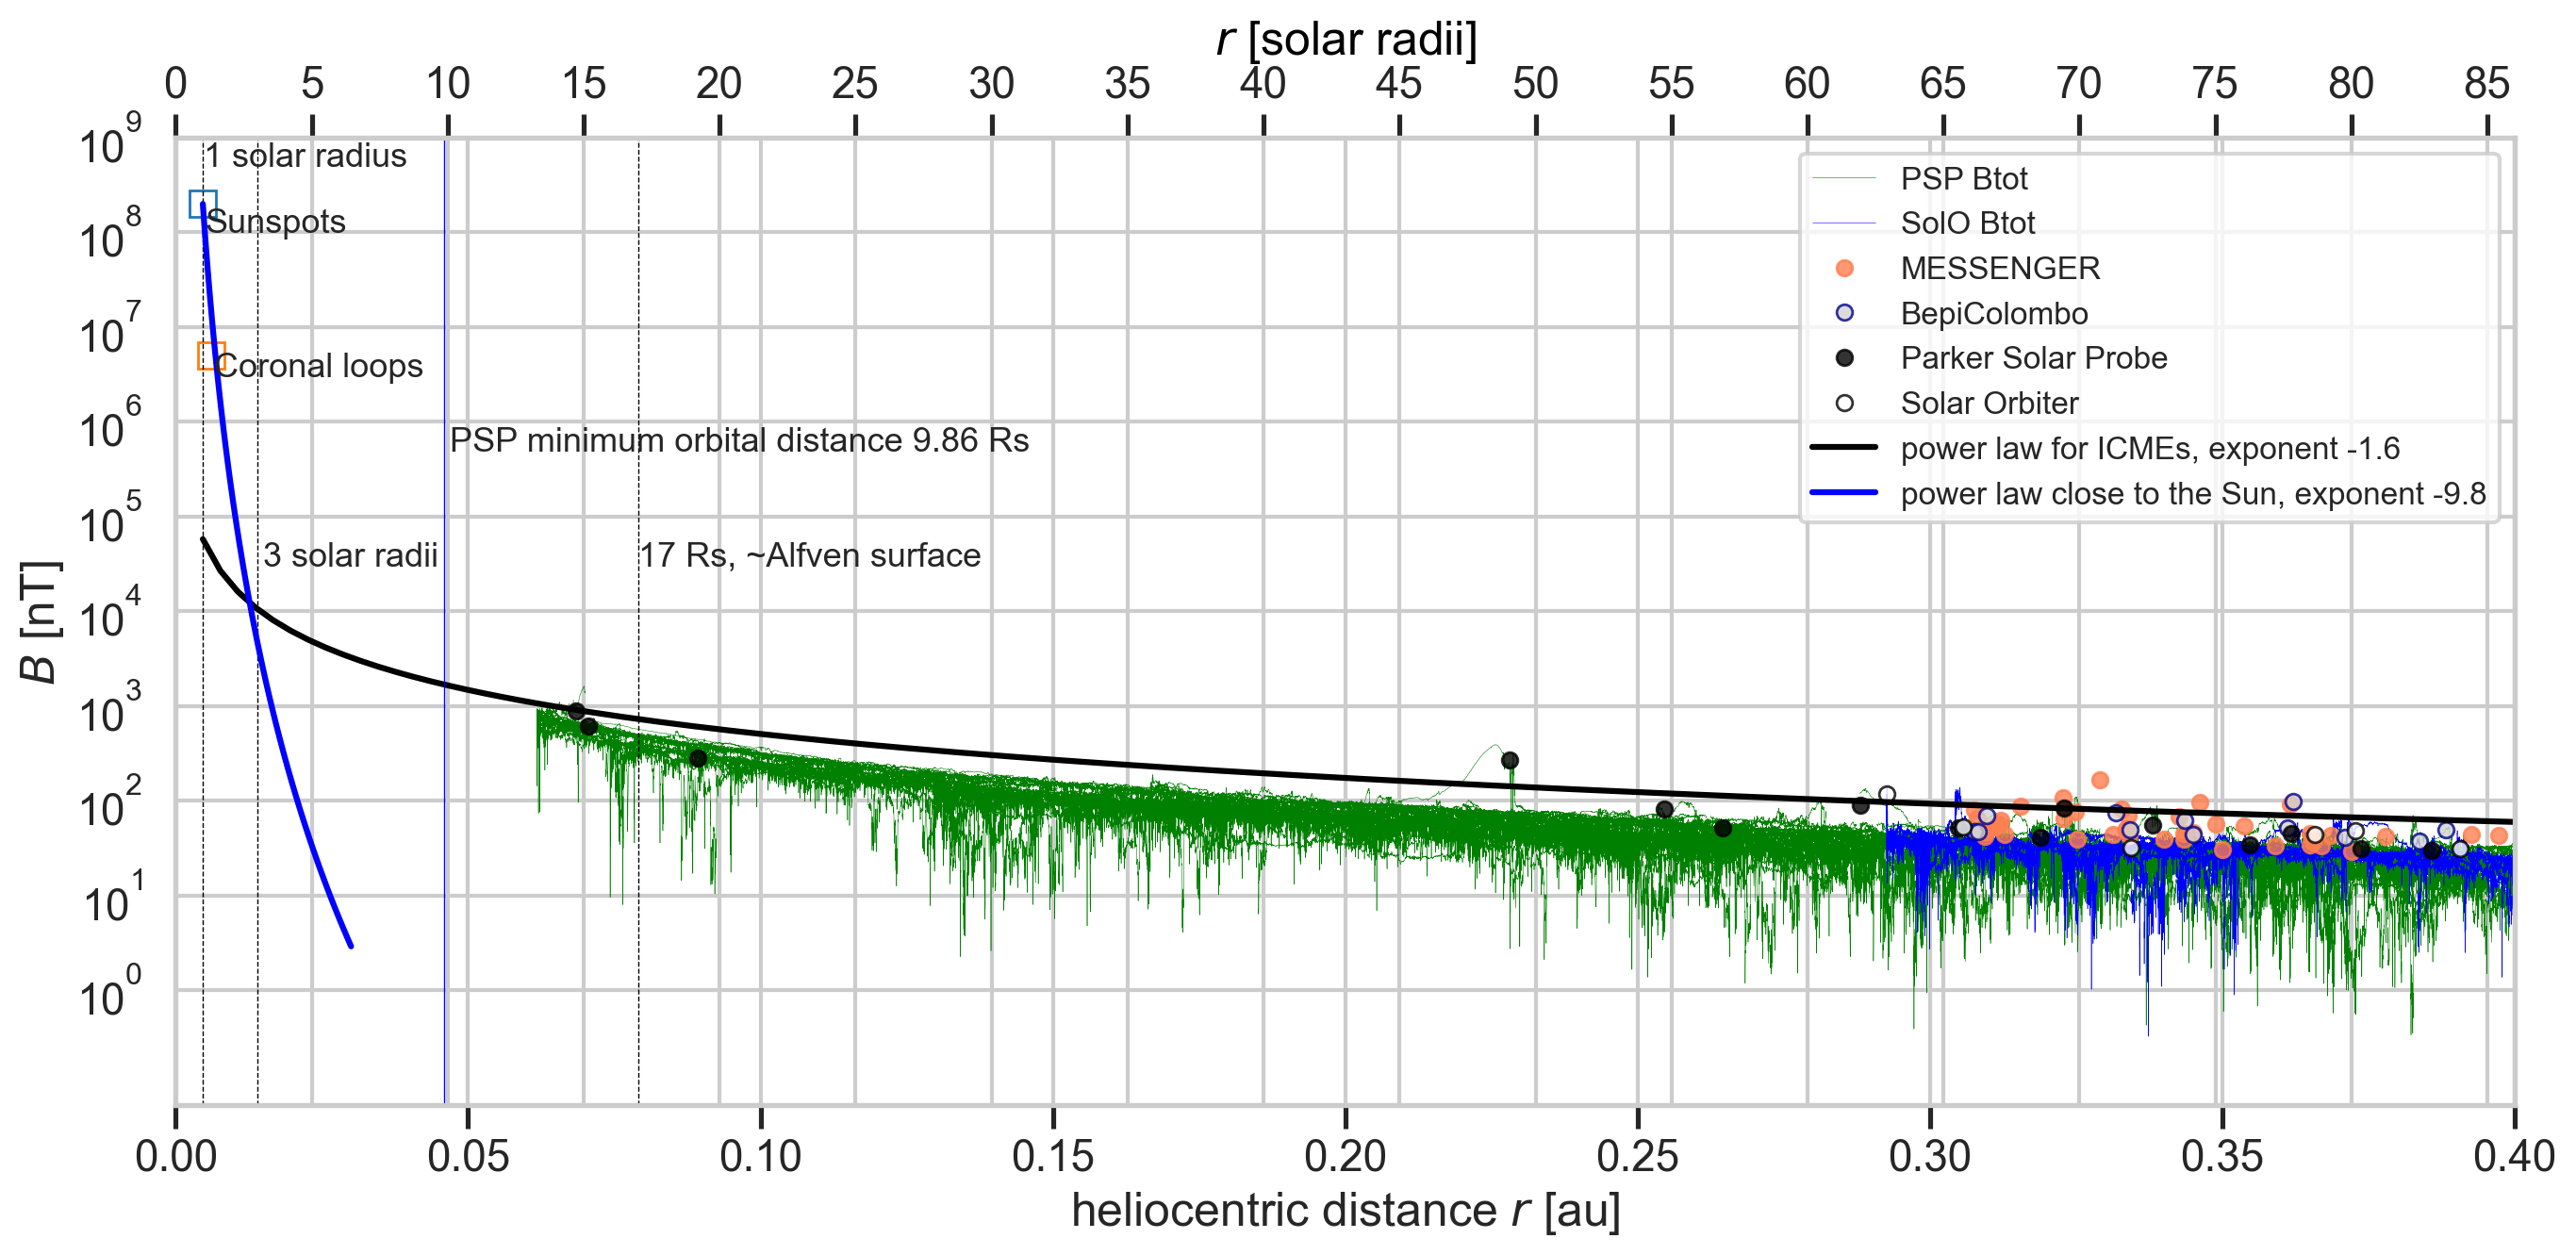

In [16]:
sns.set_context("talk")     
sns.set_style('whitegrid')

###############################################################################
fig=plt.figure(figsize=(14,7),dpi=200)

##############################################################################
ax=plt.subplot(111)
#plt.title('ICME magnetic obstacle field compared to solar observations of active regions')
ax.set_xlabel('heliocentric distance $r$ [au]')
ax.set_ylabel('$B$ [nT]')


#plot psp data
ax.plot(psp.r,psp.bt,'-g',linewidth=0.2, label='PSP Btot')
ax.plot(solo.r,solo.bt,'-b',linewidth=0.2, label='SolO Btot')

ax.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe')
ax.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter')

#ax3.set_xscale('log')
ax.set_xticks(np.arange(0,0.5,0.05))
ax_max_x=0.4
ax.set_xlim([0,ax_max_x])

ax.set_yscale('log')
ax.set_yticks([1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9])
ax.set_ylim([0,10**9])

ax.grid(True, which='both', zorder=2)


######################## Create a second x-axis with solar radii
#scaling factor au to Rs
scale=1/rs.value

ax1 = ax.twiny()
ax1.set_xlabel('$r$ [solar radii]', color='black')

#plot something in the solar radii scale but do not show it
ax1.plot(ic.mo_sc_heliodistance[ista]*scale, ic.mo_bmean[ista], '.',color=None)
ax1_ticks=np.arange(0,ax_max_x*scale,5)
ax1.set_xlim(0,ax_max_x*scale)
ax1.set_xticks(ax1_ticks)


#a 2nd axis grid is always in front of the data, for fix see bottom of https://github.com/matplotlib/matplotlib/issues/7984
ax1.set_zorder(-1)
ax.patch.set_visible(False)
ax1.patch.set_visible(True)

######################## plot fits

#param2 is the bmax fit
ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-k',label='power law for ICMEs, exponent -1.6')
#with errors 3 std
#ax3.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--k',alpha=0.5)
#ax3.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--k',alpha=0.5)


########################## add solar data points

gauss=1e5 #1 Gauss= 10^5 nT

#sunspot field strength at 1 solar radii
#https://link.springer.com/article/10.1007/s11207-006-0265-4
#average 2000 Gauss

sunspot_dist=const.R_sun/const.au #1 Rs correct
sunspot_b=2000*gauss              #general value for ARs fine?

### add coronal magnetic field
#https://iopscience.iop.org/article/10.3847/2041-8213/ac0c84/pdf
coronal_dist=1.3*const.R_sun/const.au  
coronal_b=50*gauss             

ax.plot(sunspot_dist,sunspot_b,marker='s', markerfacecolor='white',markersize='10')
ax.plot(coronal_dist,coronal_b,marker='s', markerfacecolor='white',markersize='10')

#ax3.set_ylim([1,10**9])

#vertical lines
ax.axvline(rs,linestyle='--', color='k', linewidth=0.5)
ax.axvline(3*rs,linestyle='--', color='k', linewidth=0.5)
ax.axvline(17*rs,linestyle='--', color='k', linewidth=0.5)

#PSP minimum orbit
psp_min=9.86*const.R_sun/const.au
ax.axvline(psp_min,linestyle='-', color='b', linewidth=0.5)


formulastring='$B_{MO}(r)='+str(np.round(param[0],2))+'r ^{'+str(np.round(param[1],2))+'}$'
#ax3.annotate(formulastring,xy=(0.4,0.6),xycoords='axes fraction',fontsize=20,ha='center')


#ax3.set_ylim([0,np.max(ic.mo_bmean)+50])
#ax3.set_yticks(np.arange(0,1000,10))
#ax3.set_ylim([0,1000])

#ax3.tick_params(axis="y", labelsize=12)

################################



print()
print()

print('value of power law at 1 Rs from in situ')

print('predicted field by MO power law at 1 Rs',np.round(powerlaw(rs,param[0],param[1])/gauss,2), ' Gauss')
print('sunspot field:', sunspot_b/gauss, 'Gauss ')

print()
print('predicted field by MO power law at 1.5 Rs',np.round(powerlaw(1.5*rs,param[0],param[1])/gauss,2), ' nT')
print('coronal loop field:', coronal_b/gauss, 'Gauss ')
print()





################## fit with all events < 0.35 AU? or just the two solar data points

print('B(r) < 0.3 for MO bmax')

r=ic.mo_sc_heliodistance
b=ic.mo_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

rn=r.to_numpy()
bn=b.to_numpy()

#now drop all events with > 0.35
rem2=np.where(r < 0.2)[0]

r=rn[rem2]
b=bn[rem2]


################ make power law only with 2 data points, add more data points, compare to quiet Sun
r=[sunspot_dist.value, coronal_dist.value]
b=[sunspot_b, coronal_b]

fitx2=np.linspace(rs,0.03,num=100)

#fit5_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
#fit5_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit5_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
#print(fit5_trf[0])
#print(fit5_lm[0])
print(fit5_dogbox[0])

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmax
param5=fit5_dogbox[0]
#pcov5=fit5_dogbox[1]
#perr5 = np.sqrt(np.diag(pcov5))
print('fit results in detail')
print('Parameters a and b, y = a x^b:',np.round(param5,8))
#print('3 standard deviation on a and b', 3*np.round(perr5,2))
print()
print()


print('ICME power law fails to connect to Sun')

#---------------------------------------------------------------

#ax2=plt.subplot(212)
#ax2.plot(r,b,'ok', markersize=1)
#ax2.set_yscale('log')
#ax2.set_xlim(0,3)

ax.plot(fitx2,powerlaw(fitx2,param5[0],param5[1]),'-b',label='power law close to the Sun, exponent -9.8')


############## plot annotations

annotfs=13

ax.annotate('PSP minimum orbital distance 9.86 Rs',xy=(psp_min+0.001,5*1e5),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('3 solar radii',xy=(0.015,3*1e4),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('1 solar radius',xy=(0.0048,5*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('17 Rs, ~Alfven surface',xy=(17*rs,3*1e4),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('Sunspots',xy=(0.005,1e8),xycoords='data',fontsize=annotfs,ha='left',zorder=2)
ax.annotate('Coronal loops',xy=(0.0065,3*1e6),xycoords='data',fontsize=annotfs,ha='left')


ax.legend(fontsize=12,facecolor='white')


plt.tight_layout()
plt.savefig('../results/moestl_2024_icmecat/fig5_br_mo_zoom.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig5_br_mo_zoom.pdf', dpi=150,bbox_inches='tight')


### B(R) curve fits in full ICME

B(r) for ICME Bmean
LM; TRF; dogbox methods
[ 9.78431844 -1.62173961]
[ 9.78431403 -1.62173982]
[ 9.78432914 -1.62173909]
LM results in detail
Parameters a and b, y = a x^b: [ 9.78 -1.62]
3 standard deviation on a and b [0.69 0.03]




-----------------------------
B(r) for ICME_Bmax
LM; TRF; dogbox methods
[14.95236331 -1.60740389]
[14.95241653 -1.60740219]
[14.95241877 -1.60740212]
LM results in detail
Parameters a and b, y = a x^b: [14.95 -1.61]
3 standard deviation on a and b [1.47 0.03]




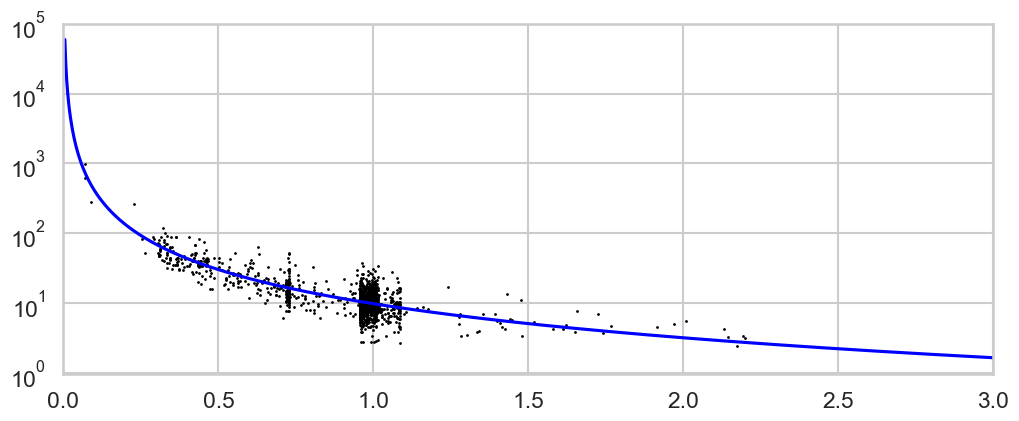

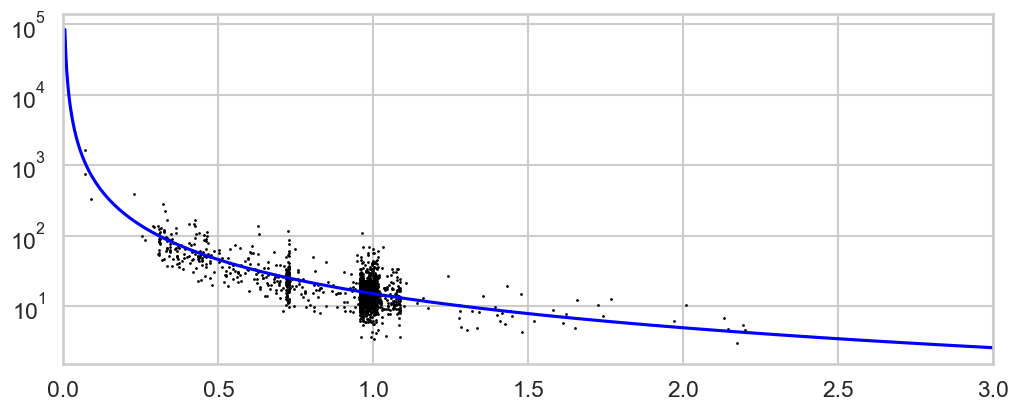

In [9]:
print('B(r) for ICME Bmean')

r=ic.mo_sc_heliodistance
b=ic.icme_bmean

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

fit3_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit3_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit3_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit3_trf[0])
print(fit3_lm[0])
print(fit3_dogbox[0])

param3=fit3_lm[0]
pcov3=fit3_lm[1]
perr3 = np.sqrt(np.diag(pcov3))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param3,2))
print('3 standard deviation on a and b', 3*np.round(perr3,2))
print()
print()
#---------------------------------------------------------------

fig=plt.figure(3,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,3)
ax.plot(fitx,powerlaw(fitx,param3[0],param3[1]),'-b')


        

print()
print()
print('-----------------------------')

###########################################################################
print('B(r) for ICME_Bmax')

r=ic.mo_sc_heliodistance
b=ic.icme_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)
fit4_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit4_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit4_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit4_trf[0])
print(fit4_lm[0])
print(fit4_dogbox[0])

param4=fit4_lm[0]
pcov4=fit4_lm[1]
perr4 = np.sqrt(np.diag(pcov4))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param4,2))
print('3 standard deviation on a and b', 3*np.round(perr4,2))
print()
print()

fig=plt.figure(6,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,3)
ax.plot(fitx,powerlaw(fitx,param4[0],param4[1]),'-b')

#all results , e.g. nfev indicates the number of function calls
#print(fit2_lm)



### Duration D(r) fits



D(r)
LM; TRF; dogbox methods
[22.31840629  0.75741841]
[22.31841519  0.75742887]
[22.3184107   0.75742361]


LM results in detail
Parameters a and b, y = a x^b: [22.32  0.76]
3 standard deviation on a and b [1.11 0.21]




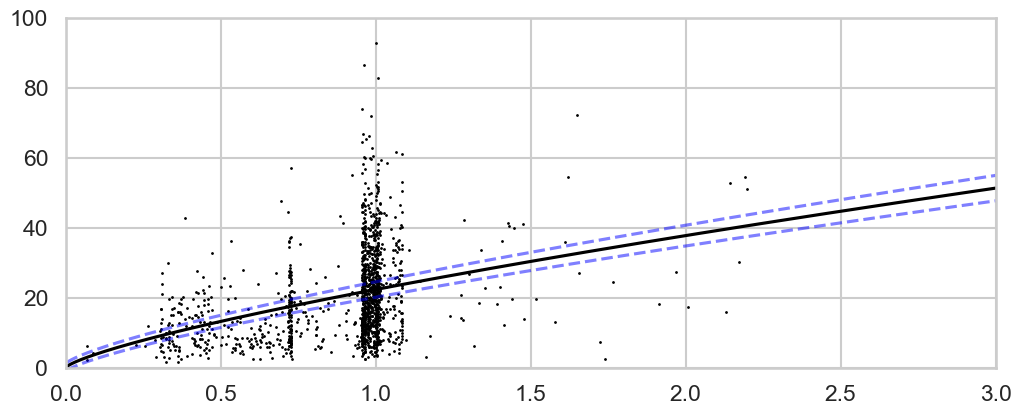

In [13]:
print('D(r)')

r=ic.mo_sc_heliodistance
d=ic.mo_duration

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(d)))[0]

r=r.drop(rem)
d=d.drop(rem)

fitx=np.linspace(rs,3,num=1000)

#curve fit, no initial guess

fit_lm=scipy.optimize.curve_fit(powerlaw, r,d,method='lm',full_output=True)
fit_trf=scipy.optimize.curve_fit(powerlaw, r,d,method='trf')
fit_dogbox=scipy.optimize.curve_fit(powerlaw, r,d,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit_lm[0])
print(fit_trf[0])
print(fit_dogbox[0])

print()
print()

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmean
param=fit_lm[0]
pcov=fit_lm[1]
perr = np.sqrt(np.diag(pcov))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param,2))
print('3 standard deviation on a and b', 3*np.round(perr,2))
print()
print()


#---------------------------------------------------------------


fig=plt.figure(5,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,d,'ok', markersize=1)
ax.set_xlim(0,3)
ax.set_ylim(0,100)

#ax.set_xlim(0,0.2)
#ax.set_ylim(0,10)


ax.plot(fitx,powerlaw(fitx,fit_lm[0][0],fit_lm[0][1]),'-k')
#with errors 3 std
ax.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--b',alpha=0.5)
ax.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--b',alpha=0.5)




